# Supply Chain Shipment Pricing - Data Analysis and Modeling

## Dataset Description: This data set provides supply chain health commodity shipment and pricing data.

### Following are steps for Data Analysis and Modeling
* Import Packages
* Import CSV file
* Check Total Records in CSV file
* Check DataType of CSV file
* Rename columns
* Print first 5 and last 5 recods from DataSet
* Total 16 Country wise count with graph
* Shipment Mode percentage wise Pie Chart
* Modeling
* Conclusion

### Import Packages

In [381]:
import os

import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from decimal import Decimal
from IPython.display import Image
import re

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

export_flag = True
if export_flag:
    import chart_studio
    chart_studio.tools.set_credentials_file(username='juniorherenio', api_key='ejhpmA3blGblNd65beIr') # API key from plotly.com

### Import CSV file

In [3]:
DataSet = pd.read_csv('SCMS_Delivery_History_Dataset.csv').fillna('no_value')

### Check Total Records in CSV file

In [4]:
TotalRowCount = len(DataSet)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 10324


### Check DataType of CSV file

In [5]:
DataSet.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


### Rename columns

In [6]:
DataSet.rename(columns={"Freight Cost (USD)": "Freight_Cost_USD"}, inplace=True)

### Print first 5 and last 5 recods from DataSet

In [7]:
DataSet[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
                          'Country', 'Shipment Mode', 'Freight_Cost_USD']]

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight (Kilograms),Country,Shipment Mode,Freight_Cost_USD
0,30,19,29.00,0.97,13,Côte d'Ivoire,Air,780.34
1,240,1000,6.20,0.03,358,Vietnam,Air,4521.5
2,100,500,80.00,0.80,171,Côte d'Ivoire,Air,1653.78
3,60,31920,3.99,0.07,1855,Vietnam,Air,16007.06
4,60,38000,3.20,0.05,7590,Vietnam,Air,45450.08
...,...,...,...,...,...,...,...,...
10319,60,166571,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)
10320,60,21072,6.52,0.11,See DN-4313 (ID#:83921),Côte d'Ivoire,Truck,See DN-4313 (ID#:83921)
10321,30,514526,9.99,0.33,Weight Captured Separately,Zambia,Truck,Freight Included in Commodity Cost
10322,60,17465,6.52,0.11,1392,Zimbabwe,Truck,Freight Included in Commodity Cost


### Total 16 Country wise count with graph

In [9]:
DataSet = DataSet.dropna()
ItemCount = DataSet["Country"].value_counts().nlargest(43)
print("Top 43 Countries Wise Count \n")
print(ItemCount)

Top 43 Countries Wise Count 

Country
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal          

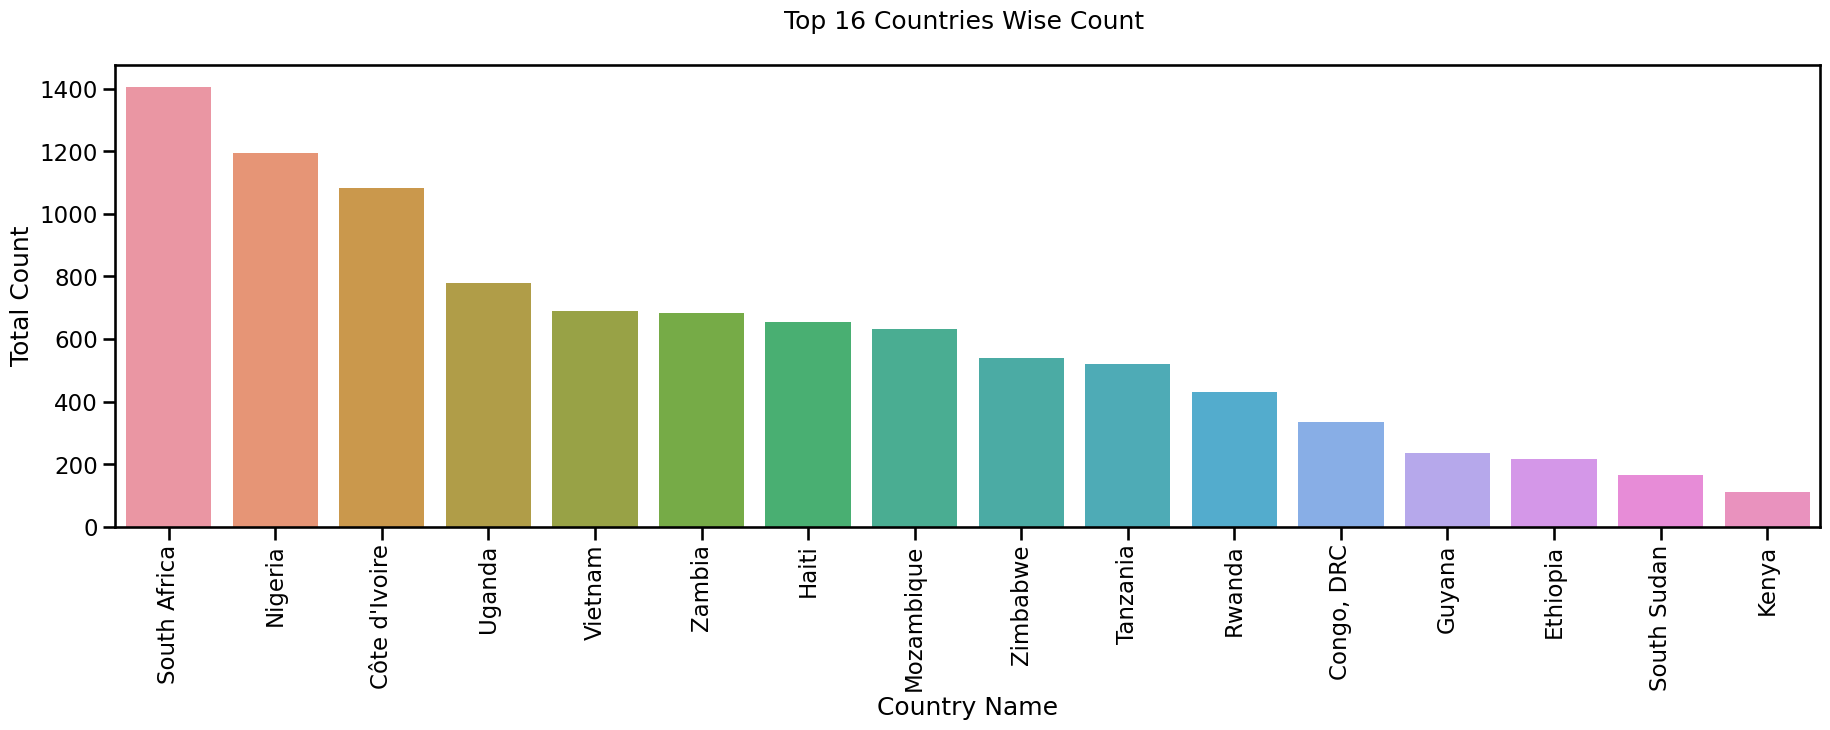

In [25]:
sn.set_context("talk", font_scale=1)
plt.figure(figsize=(22, 6))
sn.countplot(x="Country", data=DataSet, order=DataSet['Country'].value_counts().nlargest(16).index)  # Use 'x' for single variable
plt.title('Top 16 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')
plt.xticks(rotation=90)
plt.show()

### Shipment Mode percentage wise Pie Chart

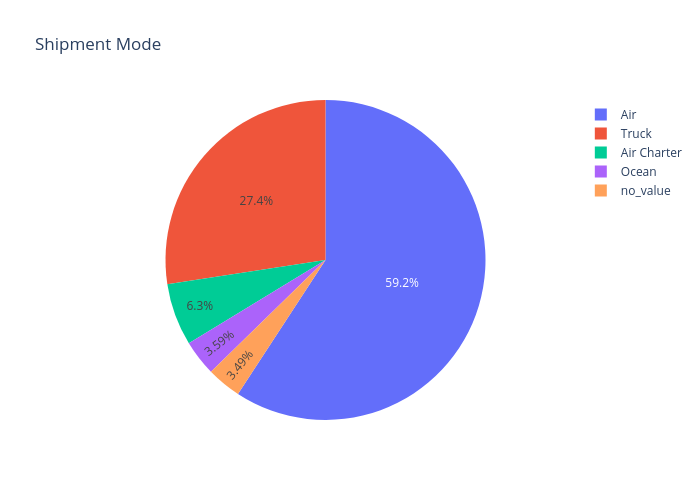

In [26]:
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)

show_image = None
if export_flag:    
    chart_studio.plotly.image.save_as(fig, filename='shipment-mode-plot.png')
    show_image = Image('shipment-mode-plot.png')
else:
    py.iplot(fig, filename="Shipment Mode")
    
show_image

## ETL (Extract, Transform, Load)

In [27]:
regex = {
    "id_number": ":\d*"
}

def change_to_number(freight_cost_usd):
    match = re.search(regex['id_number'], freight_cost_usd, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = DataSet.query("ID == "+id)
        return filtered['Freight_Cost_USD'].item()
    else:
        return freight_cost_usd
    
def convert_to_number(weight):
    match = re.search(regex['id_number'], weight, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = DataSet.query("ID == "+id)
        return filtered['Weight (Kilograms)'].item()
    else:
        return weight

In [28]:
DataSet['Freight_Cost_USD_Clean'] = DataSet['Freight_Cost_USD'].apply(change_to_number)
DataSet['Weight_Kilograms_Clean'] = DataSet['Weight (Kilograms)'].apply(convert_to_number)

In [29]:
freight_cost_indexes = DataSet.index[(DataSet['Freight_Cost_USD_Clean'] == 'Freight Included in Commodity Cost') 
                        | (DataSet['Freight_Cost_USD_Clean'] == 'Invoiced Separately')].tolist()
weight_indexes = DataSet.index[DataSet['Weight_Kilograms_Clean'] == 'Weight Captured Separately'].tolist()
shipment_indexes = DataSet.index[DataSet['Shipment Mode'] == 'no_value'].tolist()
print("Freight_Cost_USD_Clean indexes:",len(freight_cost_indexes))
print("Weight_Kilograms_Clean indexes:",len(weight_indexes))
print("Shipment Mode indexes:         ",len(shipment_indexes))

indexes = list(set(freight_cost_indexes + weight_indexes + shipment_indexes))
print("Indexes:",len(indexes))
DataSetClean = DataSet.drop(indexes)

print("Size:", DataSetClean.shape)

DataSetClean[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
                          'Country', 'Shipment Mode', 'Freight_Cost_USD']]

Freight_Cost_USD_Clean indexes: 1786
Weight_Kilograms_Clean indexes: 1633
Shipment Mode indexes:          360
Indexes: 2142
Size: (8182, 35)


,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight (Kilograms),Country,Shipment Mode,Freight_Cost_USD
0,30,19,29.00,0.97,13,Côte d'Ivoire,Air,780.34
1,240,1000,6.20,0.03,358,Vietnam,Air,4521.5
2,100,500,80.00,0.80,171,Côte d'Ivoire,Air,1653.78
3,60,31920,3.99,0.07,1855,Vietnam,Air,16007.06
4,60,38000,3.20,0.05,7590,Vietnam,Air,45450.08
...,...,...,...,...,...,...,...,...
10316,60,15000,6.52,0.11,1547,Nigeria,Air Charter,3410
10317,30,6724,3.12,0.10,See DN-4282 (ID#:83919),Nigeria,Air,See DN-4282 (ID#:83919)
10318,60,205243,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)
10319,60,166571,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)


In [30]:
shipment_mode = DataSetClean['Shipment Mode'].unique()
print('shipment mode', shipment_mode, '\n')

countries = DataSetClean['Country'].unique()
print('countries', countries, '\n')

manufacturing = DataSetClean['Manufacturing Site'].unique()
print('manufacturing', manufacturing)

shipment mode ['Air' 'Truck' 'Air Charter' 'Ocean'] 

countries ["Côte d'Ivoire" 'Vietnam' 'Nigeria' 'Tanzania' 'Zambia' 'Rwanda' 'Haiti'
 'Ethiopia' 'Guyana' 'Zimbabwe' 'Namibia' 'Botswana' 'Mozambique' 'Kenya'
 'Uganda' 'Senegal' 'Benin' 'Lesotho' 'Swaziland' 'Angola' 'Pakistan'
 'Sierra Leone' 'Cameroon' 'South Sudan' 'Burundi' 'South Africa' 'Malawi'
 'Congo, DRC' 'Dominican Republic' 'Sudan' 'Mali' 'Ghana' 'Togo'
 'Afghanistan' 'Guatemala' 'Liberia' 'Guinea' 'Libya'] 

manufacturing ['Ranbaxy Fine Chemicals LTD' 'Aurobindo Unit III, India'
 'ABBVIE GmbH & Co.KG Wiesbaden' 'Ranbaxy, Paonta Shahib, India'
 'Trinity Biotech, Plc' 'Cipla, Goa, India' 'Premier Med. Corp Ltd. India'
 'BMS Meymac, France' 'Chembio Diagnostics Sys. Inc.'
 'ABBVIE Ludwigshafen Germany' 'Inverness Japan'
 'Pacific Biotech, Thailand' 'Standard Diagnostics, Korea'
 'Gilead(Nycomed) Oranienburg DE' 'Bio-Rad Laboratories'
 'Mylan (formerly Matrix) Nashik' 'Novartis Pharma AG, Switzerland'
 'Not Applicable' 'Ipc

### Change data type of columns

In [31]:
DataSetClean['Freight_Cost_USD_Clean'] = pd.to_numeric(DataSetClean['Freight_Cost_USD_Clean'])
DataSetClean['Weight_Kilograms_Clean'] = pd.to_numeric(DataSetClean['Weight_Kilograms_Clean'])
DataSetClean.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


## Machine Learning Modeling

In [35]:
# Check available columns
available_columns = DataSetClean.columns.tolist()

# Select only existing encoded columns
encoded_cols = [col for col in ['country_encoded', 'shipment_mode_encoded', 'manufacturing_site_encoded'] if col in available_columns]

predictors = DataSetClean[encoded_cols + ['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight_Kilograms_Clean']]


In [36]:
predictors.describe()

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight_Kilograms_Clean
count,"8,182.00","8,182.00","8,182.00","8,182.00","8,182.00"
mean,75.33,"21,201.81",20.68,0.60,"4,545.52"
std,76.55,"42,549.60",41.77,2.35,"13,661.93"
min,1.00,1.00,0.00,0.00,0.00
25%,30.00,847.25,3.78,0.07,283.00
50%,60.00,"4,449.50",8.26,0.15,"1,351.50"
75%,90.00,"21,505.50",20.50,0.41,"4,481.25"
max,"1,000.00","619,999.00","1,250.00",30.00,"857,354.00"


In [37]:
targets = DataSetClean.Freight_Cost_USD_Clean
targets

0                     780.34
1                   4,521.50
2                   1,653.78
3                  16,007.06
4                  45,450.08
                ...         
10316               3,410.00
10317              47,281.56
10318              46,111.55
10319              46,111.55
10320              14,734.92
Name: Freight_Cost_USD_Clean, Length: 8182, dtype: float64

### Correlations

c:\Users\junio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



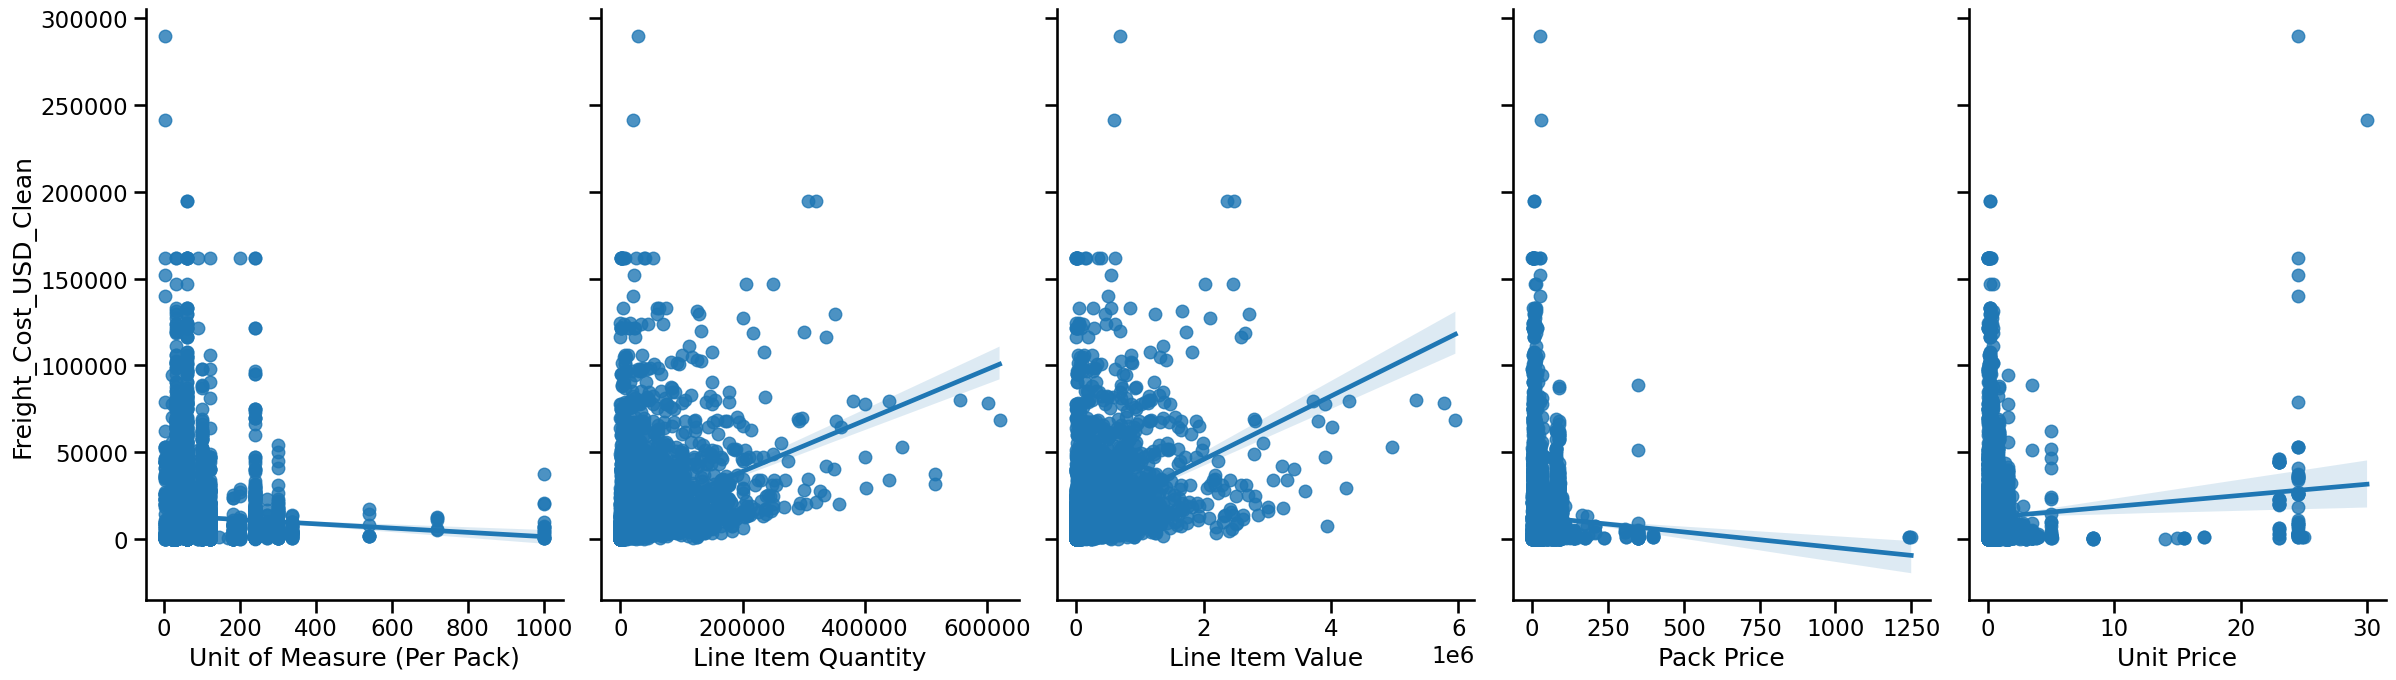

In [38]:
sn.pairplot(DataSetClean, 
            x_vars=['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price'],
            y_vars='Freight_Cost_USD_Clean', height=7, aspect=0.7, kind='reg')

### Test and Training Data

In [39]:
train_features, test_features, train_targets, test_targets = train_test_split(predictors, targets, test_size=0.2, random_state=3)

print('test features shape: ', test_features.shape)
print('test targets shape: ', test_targets.shape)

print('train features shape: ', train_features.shape)
print('train targets shape: ', train_targets.shape)

test features shape:  (1637, 5)
test targets shape:  (1637,)
train features shape:  (6545, 5)
train targets shape:  (6545,)


### Decision Tree Regressor

In [40]:
tree_regressor = DecisionTreeRegressor(max_depth=15)

tree_regressor = tree_regressor.fit(train_features, train_targets)

print('node_count => ', tree_regressor.tree_.node_count)

tree_regressor.get_params()

node_count =>  3801


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

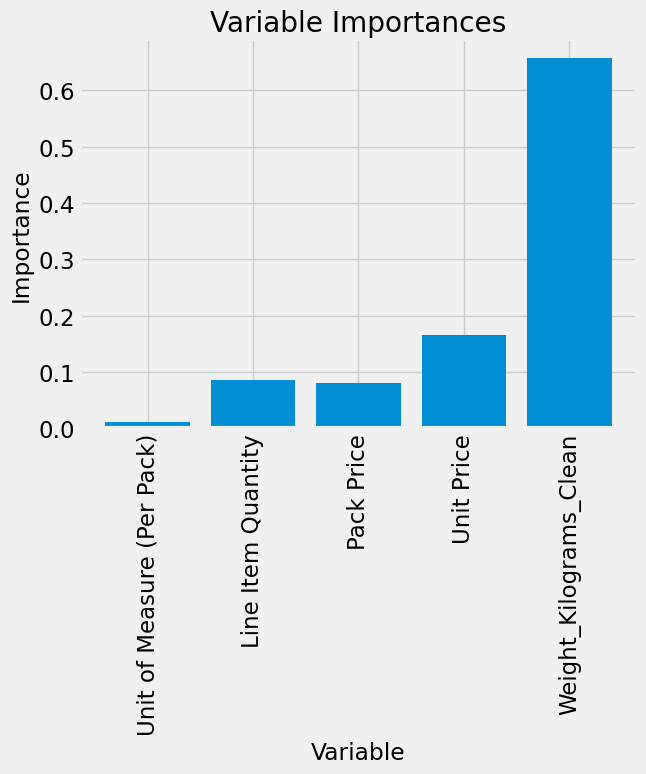

In [41]:
# Saving feature names for later use
feature_list = list(predictors.columns)
importances = list(tree_regressor.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Verify model using Test Data

In [42]:
# It was redict for the values of the Test group
tree_predictions = tree_regressor.predict(test_features)
df = pd.DataFrame({'Actual':test_targets, 'Predicted':tree_predictions})  
df

,Actual,Predicted
10026,"3,526.27","2,232.71"
5425,"1,400.91","4,498.90"
2860,"11,314.20","4,902.45"
7063,"6,036.96","6,036.96"
1750,"2,989.45","12,102.81"
...,...,...
9356,"2,528.69","2,232.71"
1400,"1,053.86",734.66
317,"12,770.05","11,063.78"
3440,365.48,"1,042.64"


### Metrics

In [59]:
results = pd.DataFrame({'Score':['Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R Square']})
tree_score = [metrics.mean_absolute_error(test_targets, tree_predictions),
             np.sqrt(metrics.mean_squared_error(test_targets, tree_predictions)),
             metrics.mean_squared_error(test_targets, tree_predictions)/10000,
             metrics.r2_score(test_targets, tree_predictions)*10000]
results['Tree Desicion'] = tree_score

print('Mean Absolute Error:     {} [$]'.format(results.iloc[0, 1]))    
print('Root Mean Squared Error: {} [$]'.format(results.iloc[1, 1]))
print('Mean Squared Error:      {} [$]'.format(results.iloc[2, 1]))
print('R Square:                {} [%]'.format(results.iloc[3, 1])) # 1 is better
results

Mean Absolute Error:     6956.315830874706 [$]
Root Mean Squared Error: 14885.701153429165 [$]
Mean Squared Error:      22158.409882920238 [$]
R Square:                3829.711848382098 [%]


,Score,Tree Desicion
0,Mean Absolute Error,"6,956.32"
1,Root Mean Squared Error,"14,885.70"
2,Mean Squared Error,"22,158.41"
3,R Square,"3,829.71"


### Random Forest Regressor

In [44]:
rand_forest_regressor = RandomForestRegressor(n_estimators=500, random_state=3)

rand_forest_regressor = rand_forest_regressor.fit(train_features, train_targets)

rand_forest_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

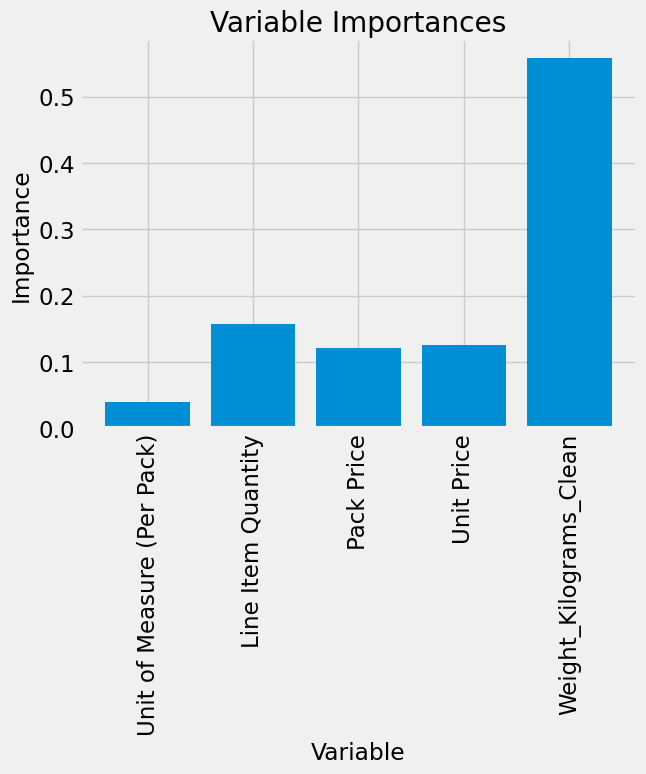

In [45]:
# Saving feature names for later use
feature_list = list(predictors.columns)
importances = list(rand_forest_regressor.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation='vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Verify Model using Test Data

In [46]:
rf_predictions = rand_forest_regressor.predict(test_features)
df = pd.DataFrame({'Actual':test_targets, 'Predicted':rf_predictions})  
df

,Actual,Predicted
10026,"3,526.27","4,387.45"
5425,"1,400.91","2,186.51"
2860,"11,314.20","16,569.82"
7063,"6,036.96","5,284.88"
1750,"2,989.45","4,623.51"
...,...,...
9356,"2,528.69","4,747.50"
1400,"1,053.86","2,377.66"
317,"12,770.05","9,218.10"
3440,365.48,"1,135.41"


### Metrics

In [57]:
rf_score = [metrics.mean_absolute_error(test_targets, rf_predictions),
            np.sqrt(metrics.mean_squared_error(test_targets, rf_predictions)),
            metrics.mean_squared_error(test_targets, rf_predictions)/10000,
            metrics.r2_score(test_targets, rf_predictions)*10000]
results['Random Forest'] = rf_score

print('Mean Absolute Error:     {} [$]'.format(results.iloc[0, 2]))    
print('Root Mean Squared Error: {} [$]'.format(results.iloc[1, 2]))
print('Mean Squared Error:      {} [$]'.format(results.iloc[2, 2]))
print('R Square:                {} [%]'.format(results.iloc[3, 2])) # 1 is better
results

Mean Absolute Error:     6643.120838427114 [$]
Root Mean Squared Error: 13482.4036813281 [$]
Mean Squared Error:      18177.52090262895 [$]
R Square:                4938.24049451618 [%]


,Score,Tree Desicion,Random Forest
0,Mean Absolute Error,"6,956.32","6,643.12"
1,Root Mean Squared Error,"14,885.70","13,482.40"
2,Mean Squared Error,"22,158.41","18,177.52"
3,R Square,"3,829.71","4,938.24"


### Comparison

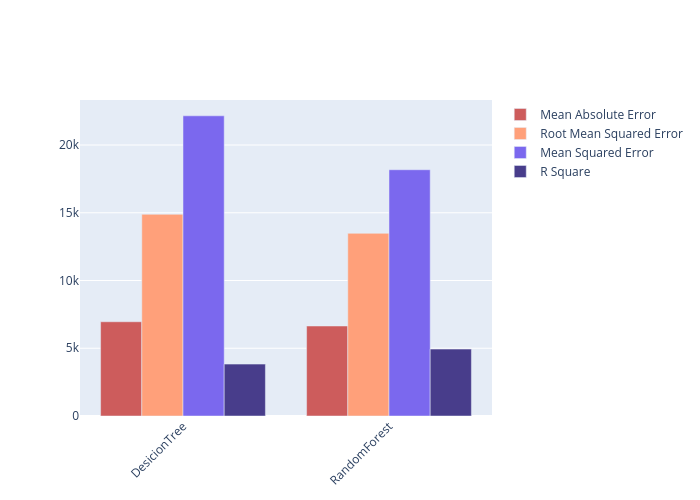

In [58]:
model_name = ['DesicionTree', 'RandomForest']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[0,1:],
    name='Mean Absolute Error',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[1,1:],
    name='Root Mean Squared Error',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[2,1:],
    name='Mean Squared Error',
    marker_color='mediumslateblue'
))
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[3,1:],
    name='R Square',
    marker_color='darkslateblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.layout.update(barmode='group', xaxis_tickangle=-45)

show_image = None
if export_flag:
    chart_studio.plotly.image.save_as(fig, filename='comparison-plot.png')
    show_image = Image('comparison-plot.png')
else:
    fig.show()

show_image

In [54]:
print(results)

                     Score        Tree Desicion
0      Mean Absolute Error             6,956.32
1  Root Mean Squared Error            14,885.70
2       Mean Squared Error            22,158.41
3                 R Square             3,829.71


## Using a TensorFlow/Keras neural network to make the predictions.

### Data manipulation and prepatation (data processing)
* Data processing and coding could be performed from a function

In [421]:
data = pd.read_csv('SCMS_Delivery_History_Dataset.csv').fillna('no_value')

In [422]:
# Copy the data to avoid modifying the original DataFrame
df = data.copy()

In [423]:
# Drop ID column
df = df.drop('ID', axis=1)

In [424]:
# Drop missing target rows
missing_target_rows = df[df['Shipment Mode'].isna()].index
df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

In [425]:
# convert the values to a numeric type (float), before calculating the mean and filling in missing values.
df['Line Item Insurance (USD)'] = pd.to_numeric(df['Line Item Insurance (USD)'], errors='coerce')

In [426]:
# Fill missing values
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())

In [427]:
# Drop date columns with too many missing values
df = df.drop(['PQ First Sent to Client Date', 'PO Sent to Vendor Date'], axis=1)

In [428]:
# Extract date features
for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
  df[column] = pd.to_datetime(df[column])
  df[column + ' Year'] = df[column].apply(lambda x: x.year)
  df[column + ' Month'] = df[column].apply(lambda x: x.month)
  df[column + ' Day'] = df[column].apply(lambda x: x.day)
  df = df.drop(column, axis=1)

C:\Users\junio\AppData\Local\Temp\ipykernel_20312\70057649.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\junio\AppData\Local\Temp\ipykernel_20312\70057649.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\junio\AppData\Local\Temp\ipykernel_20312\70057649.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [429]:
# Drop numeric columns with too many missing values
df = df.drop(['Weight (Kilograms)', 'Freight Cost (USD)'], axis=1)
    
# Drop high-cardinality columns
df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis=1)

### Ecoding

In [430]:
# Binary encoding
df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop': 0, 'From RDC': 1})
df['First Line Designation'] = df['First Line Designation'].replace({'No': 0, 'Yes': 1})

In [431]:
# One-hot encoding
for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
  dummies = pd.get_dummies(df[column], prefix=column)
  df = pd.concat([df, dummies], axis=1)
  df = df.drop(column, axis=1)

In [432]:
# Split df into X and y
y = df['Shipment Mode']
X = df.drop('Shipment Mode', axis=1)

In [433]:
# Encode labels (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [434]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [435]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [436]:
X_train, X_test, y_train, y_test

(              Fulfill Via  Unit of Measure (Per Pack)   Line Item Quantity  \
 0                   -1.05                       -0.24                -0.46   
 1                    0.96                       -0.24                 0.30   
 2                   -1.05                       -0.66                -0.41   
 3                   -1.05                       -0.24                 0.01   
 4                   -1.05                       -0.66                 0.95   
 ...                   ...                         ...                  ...   
 7221                -1.05                       -0.66                -0.16   
 7222                 0.96                       -0.24                 1.54   
 7223                -1.05                       -0.66                -0.33   
 7224                -1.05                       -0.24                -0.45   
 7225                -1.05                        0.32                -0.42   
 
           Line Item Value           Pack Price   

In [437]:
# Convert to Pandas Series (if necessary)
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

# Count class frequencies
class_counts = y_train.value_counts()
print(class_counts)

0    4249
3    1993
1     478
2     256
4     250
Name: count, dtype: int64


In [438]:
y_train.value_counts()

0    4249
3    1993
1     478
2     256
4     250
Name: count, dtype: int64

In [439]:
# Drop the label 4 out
rows_to_drop = y_train[y_train == 4].index
y_train = y_train.drop(index=rows_to_drop)

In [440]:
X_test.value_counts()

Fulfill Via  Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  Pack Price  Unit Price  First Line Designation  Line Item Insurance (USD)  Scheduled Delivery Date Year  Scheduled Delivery Date Month  Scheduled Delivery Date Day  Delivered to Client Date Year  Delivered to Client Date Month  Delivered to Client Date Day  Delivery Recorded Date Year  Delivery Recorded Date Month  Delivery Recorded Date Day  Project Code_100-BJ-T30  Project Code_100-BW-T01  Project Code_100-BZ-T30  Project Code_100-CI-T01  Project Code_100-DO-T30  Project Code_100-GH-T01  Project Code_100-GH-T30  Project Code_100-GN-T30  Project Code_100-HT-T01  Project Code_100-KZ-T01  Project Code_100-LB-T01  Project Code_100-PK-T01  Project Code_100-SL-T01  Project Code_100-SN-T01  Project Code_100-SZ-T01  Project Code_100-ZM-T30  Project Code_100-ZW-T01  Project Code_100-ZW-T30  Project Code_101-AF-T30  Project Code_101-CD-T30  Project Code_101-KE-T30  Project Code_101-ZA-T30  Project Code_102-AO-T30  Pr

In [441]:
inputs = tf.keras.Input(shape=(776,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [442]:
print(len(X_train))
print(len(y_train))

7226
6976


In [443]:
# Ensuring that both training sets have the same number of samples
X_train = X_train[:6976]
y_train = y_train[:7226]

In [444]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
175/175 [==============================] - 1s 5ms/step - loss: 1.0589 - accuracy: 0.5910 - val_loss: 1.0100 - val_accuracy: 0.5759
Epoch 2/100
175/175 [==============================] - 0s 3ms/step - loss: 0.9247 - accuracy: 0.6185 - val_loss: 1.0527 - val_accuracy: 0.5673
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.8927 - accuracy: 0.6251 - val_loss: 1.0585 - val_accuracy: 0.5652
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.8678 - accuracy: 0.6324 - val_loss: 1.0672 - val_accuracy: 0.5688


### Results

In [452]:
# Mapeamento de rótulos
LABEL_MAPPING = {
    'Air': 0,
    'Truck': 1,
    'Air Charter': 2,
    'Ocean': 3
}


In [453]:
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAPPING.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAPPING.values()), target_names=list(LABEL_MAPPING.keys()))

97/97 [==============================] - 0s 1ms/step


In [458]:
# Mapeamento de rótulos
LABEL_MAPPING = {
    'Air': 0,
    'Truck': 1,
    'Air Charter': 2,
    'Ocean': 3
}

# Criar uma nova matriz de confusão com base nos rótulos corretos
new_cf_matrix = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        new_cf_matrix[i, j] = cf_matrix[LABEL_MAPPING[list(LABEL_MAPPING.keys())[i]], LABEL_MAPPING[list(LABEL_MAPPING.keys())[j]]]

print(new_cf_matrix)


[[2.04e+03 8.00e+00 3.00e+00 1.23e+02]
 [7.80e+01 0.00e+00 0.00e+00 2.00e+00]
 [3.70e+01 0.00e+00 0.00e+00 3.00e+00]
 [4.24e+02 2.00e+00 0.00e+00 1.80e+01]]


In [ ]:
cmy_pred = y_pred[:10324]
y = y[:3098]

Classification Report:
----------------------
               precision    recall  f1-score   support

         Air       0.59      0.92      0.72      1864
       Truck       0.00      0.00      0.00       172
 Air Charter       0.00      0.00      0.00       115
       Ocean       0.14      0.03      0.05       837

   micro avg       0.56      0.58      0.57      2988
   macro avg       0.18      0.24      0.19      2988
weighted avg       0.41      0.58      0.46      2988



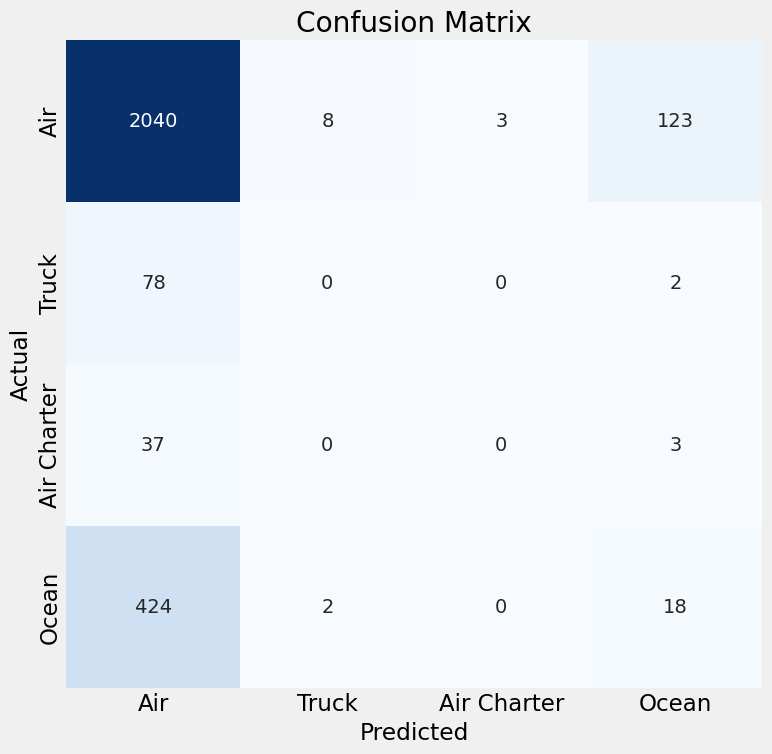

In [466]:
plt.figure(figsize=(8, 8))
sn.heatmap(new_cf_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

print("Classification Report:\n----------------------\n", clr)